In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
class TimeSeriesCreation():
    def __init__(self,xmin,xmax,num_points):
        self.xmin=xmin
        self.xmax=xmax
        self.num_points=num_points
        self.linespace_points=(xmax-xmin)/num_points
        self.x_data=np.linspace(xmin,xmax,num_points)
        self.y_true=np.sin(self.x_data)
    def ret_true(self,x_data):
        return np.sin(x_data)
    def next_batch(self,batch_size,steps):
        rand_val=np.random.rand(batch_size,1)
        
        point_space_to_leftbehind= steps * self.linespace_points
        ts_start=rand_val * (self.xmax - self.xmin - point_space_to_leftbehind)
        
        batch_ts=np.linspace(ts_start,ts_start + point_space_to_leftbehind,steps)
        
        y_data=np.sin(batch_ts)
        
        return y_data,batch_ts
        

In [4]:
ts_batch=TimeSeriesCreation(0,10,250)

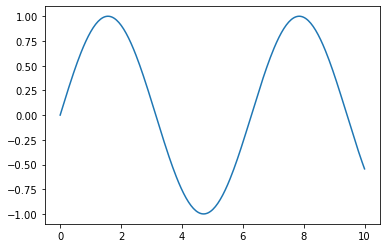

In [6]:
plt.plot(ts_batch.x_data,ts_batch.y_true)

In [20]:
batch_size=1
steps=30
y_batch,batch_ts=ts_batch.next_batch(1,30)

In [21]:
y_batch.shape,batch_ts.shape

((30, 1, 1), (30, 1, 1))

In [22]:
y_batch_reshape=y_batch.reshape((-1,30))
batch_ts_reshape=batch_ts.reshape((-1,30))

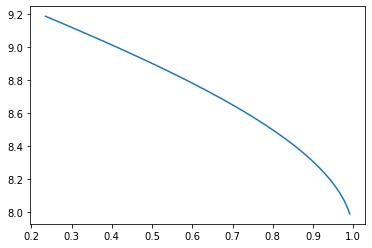

In [23]:
plt.plot(y_batch_reshape .flatten(),batch_ts_reshape.flatten())

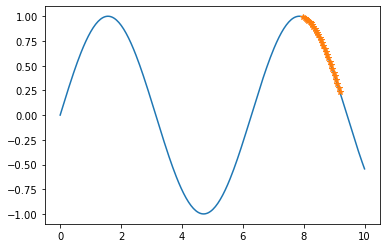

In [24]:
plt.plot(ts_batch.x_data,ts_batch.y_true)
plt.plot(batch_ts_reshape.flatten(),y_batch_reshape.flatten(),'*')

## Lets create and train the model
### We will create a training instance and will test it once after the model is created.

In [25]:
train_inst=np.linspace(5, 5 + (ts_batch.linespace_points * (steps + 1)),steps + 1)

In [26]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

In [27]:
train_inst.shape

(31,)

## We will train two batches 
### one from 1 to 30 and another from 2 to 31
#### We will retrieve values from the method ret_true

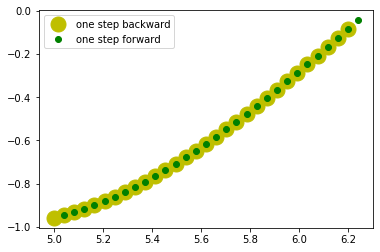

In [37]:
plt.plot(train_inst[:-1],ts_batch.ret_true(train_inst[:-1]),'yo',markersize=15,label='one step backward')
plt.plot(train_inst[1:],ts_batch.ret_true(train_inst[1:]),'go',label='one step forward')
plt.legend()

## Lets train the model

In [38]:
tf.compat.v1.disable_eager_execution()

batch_size=1
input_num=1
neurons=1000
output_num=1
learning_rate=0.0001
iterations=1000

In [40]:
## inputs and outputs
x=tf.compat.v1.placeholder(tf.float32,shape=[None,steps,input_num])
y=tf.compat.v1.placeholder(tf.float32,shape=[None,steps,output_num])


### lets build a model
#### We will first create RNn cell

In [ ]:
cell = tf.compat.v1.